In [1]:
# importing the required libraries 
import pandas as pd
import numpy as np
import altair as alt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns


## Diff-in-Diff Analysis Of Drug Related Prescriptions in Florida

In [2]:
# loading data for drug prescriptions in Florida and neighbouring states 
prescriptions = pd.read_csv("../05_cleaned_data/prescriptions_fl.csv",low_memory = False)
prescriptions

,REPORTER_DEA_NO,REPORTER_BUS_ACT,REPORTER_NAME,REPORTER_ADDL_CO_INFO,REPORTER_ADDRESS1,REPORTER_ADDRESS2,REPORTER_CITY,REPORTER_STATE,REPORTER_ZIP,REPORTER_COUNTY,...,CountyName,StateName,CountyFIPS,StateAbbr,STATE_COUNTY,state_abbrev,FIP_unique,State,Population,county_test
0,PB0034861,DISTRIBUTOR,BELLCO DRUG CORP,NaN,5500 NEW HORIZONS BLVD,NaN,NORTH AMITYVILLE,NY,11701.0,SUFFOLK,...,palm beach,Florida,12099,FL,FL | PALM BEACH,FL,1209912,FL,1286586.0,Palm Beach
1,PB0034861,DISTRIBUTOR,BELLCO DRUG CORP,NaN,5500 NEW HORIZONS BLVD,NaN,NORTH AMITYVILLE,NY,11701.0,SUFFOLK,...,palm beach,Florida,12099,FL,FL | PALM BEACH,FL,1209912,FL,1286586.0,Palm Beach
2,PB0034861,DISTRIBUTOR,BELLCO DRUG CORP,NaN,5500 NEW HORIZONS BLVD,NaN,NORTH AMITYVILLE,NY,11701.0,SUFFOLK,...,palm beach,Florida,12099,FL,FL | PALM BEACH,FL,1209912,FL,1286586.0,Palm Beach
3,PB0034861,DISTRIBUTOR,BELLCO DRUG CORP,NaN,5500 NEW HORIZONS BLVD,NaN,NORTH AMITYVILLE,NY,11701.0,SUFFOLK,...,palm beach,Florida,12099,FL,FL | PALM BEACH,FL,1209912,FL,1286586.0,Palm Beach
4,PB0034861,DISTRIBUTOR,BELLCO DRUG CORP,NaN,5500 NEW HORIZONS BLVD,NaN,NORTH AMITYVILLE,NY,11701.0,SUFFOLK,...,palm beach,Florida,12099,FL,FL | PALM BEACH,FL,1209912,FL,1286586.0,Palm Beach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66472,RC0238104,DISTRIBUTOR,CARDINAL HEALTH,NaN,2512 WESTCOTT BLVD,NaN,KNOXVILLE,TN,37931.0,KNOX,...,grundy,Tennessee,47061,TN,TN | GRUNDY,TN,4706147,TN,13583.0,Grundy
66473,RC0238104,DISTRIBUTOR,CARDINAL HEALTH,NaN,2512 WESTCOTT BLVD,NaN,KNOXVILLE,TN,37931.0,KNOX,...,grundy,Tennessee,47061,TN,TN | GRUNDY,TN,4706147,TN,13583.0,Grundy
66474,RC0238104,DISTRIBUTOR,CARDINAL HEALTH,NaN,2512 WESTCOTT BLVD,NaN,KNOXVILLE,TN,37931.0,KNOX,...,grundy,Tennessee,47061,TN,TN | GRUNDY,TN,4706147,TN,13583.0,Grundy
66475,RC0238104,DISTRIBUTOR,CARDINAL HEALTH,NaN,2512 WESTCOTT BLVD,NaN,KNOXVILLE,TN,37931.0,KNOX,...,grundy,Tennessee,47061,TN,TN | GRUNDY,TN,4706147,TN,13583.0,Grundy


In [3]:
prescriptions.columns

Index(['REPORTER_DEA_NO', 'REPORTER_BUS_ACT', 'REPORTER_NAME',
       'REPORTER_ADDL_CO_INFO', 'REPORTER_ADDRESS1', 'REPORTER_ADDRESS2',
       'REPORTER_CITY', 'REPORTER_STATE', 'REPORTER_ZIP', 'REPORTER_COUNTY',
       'BUYER_DEA_NO', 'BUYER_BUS_ACT', 'BUYER_NAME', 'BUYER_ADDL_CO_INFO',
       'BUYER_ADDRESS1', 'BUYER_ADDRESS2', 'BUYER_CITY', 'BUYER_STATE',
       'BUYER_ZIP', 'BUYER_COUNTY', 'TRANSACTION_CODE', 'DRUG_CODE', 'NDC_NO',
       'DRUG_NAME', 'QUANTITY', 'UNIT', 'ACTION_INDICATOR', 'ORDER_FORM_NO',
       'CORRECTION_NO', 'STRENGTH', 'TRANSACTION_DATE', 'CALC_BASE_WT_IN_GM',
       'DOSAGE_UNIT', 'TRANSACTION_ID', 'Product_Name', 'Ingredient_Name',
       'Measure', 'MME_Conversion_Factor', 'Combined_Labeler_Name',
       'Revised_Company_Name', 'Reporter_family', 'dos_str', 'Year', 'Month',
       'StateFIPS', 'CountyName', 'StateName', 'CountyFIPS', 'StateAbbr',
       'STATE_COUNTY', 'state_abbrev', 'FIP_unique', 'State', 'Population',
       'county_test'],
      dtyp

In [4]:
# reducing the number of columns in the drug prescriptions dataset by including only the relevant attributes to create a new dataset

prescriptions_reduced = prescriptions[['DRUG_CODE',
       'DRUG_NAME', 'QUANTITY', 'Product_Name',
       'Measure', 'Year', 'Month',
       'StateFIPS', 'StateName', 'CountyFIPS',
       'state_abbrev', 'FIP_unique', 'Population','county_test']]

In [5]:
prescriptions_reduced

,DRUG_CODE,DRUG_NAME,QUANTITY,Product_Name,Measure,Year,Month,StateFIPS,StateName,CountyFIPS,state_abbrev,FIP_unique,Population,county_test
0,9143.0,OXYCODONE,3.0,OXYCODONE HCL 80MG TABS,TAB,2007.0,2.0,12,Florida,12099,FL,1209912,1286586.0,Palm Beach
1,9143.0,OXYCODONE,3.0,OXYCODONE HCL 80MG TABS,TAB,2007.0,3.0,12,Florida,12099,FL,1209912,1286586.0,Palm Beach
2,9143.0,OXYCODONE,6.0,ENDOCET - 10MG OXYCODONE.HCL/325MG A,TAB,2007.0,4.0,12,Florida,12099,FL,1209912,1286586.0,Palm Beach
3,9143.0,OXYCODONE,12.0,OXYCODONE HYDROCHLORIDE USP 30MG TAB,TAB,2007.0,4.0,12,Florida,12099,FL,1209912,1286586.0,Palm Beach
4,9193.0,HYDROCODONE,1.0,"HYDROCOD.BIT.& APAP,10MG/660MG/TAB",TAB,2007.0,4.0,12,Florida,12099,FL,1209912,1286586.0,Palm Beach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66472,9193.0,HYDROCODONE,4.0,HYDROCODO.BIT 10MG&AC TAB,TAB,2012.0,4.0,47,Tennessee,47061,TN,4706147,13583.0,Grundy
66473,9193.0,HYDROCODONE,3.0,HYDROCODONE BIT. 10MG/ACETAMINOPHEN,TAB,2012.0,5.0,47,Tennessee,47061,TN,4706147,13583.0,Grundy
66474,9193.0,HYDROCODONE,3.0,HYDROCODONE BIT & ACETA 7.5MG/500MG,TAB,2012.0,6.0,47,Tennessee,47061,TN,4706147,13583.0,Grundy
66475,9143.0,OXYCODONE,7.0,"OXYCODONE HCL 30MG TABLETS, 100 CT",TAB,2012.0,7.0,47,Tennessee,47061,TN,4706147,13583.0,Grundy


In [6]:
# creating a copy of reduced dataset of prescriptions and converting some of the attributes to appropriate data type

prescriptions_reduced_copy = prescriptions_reduced.copy()

prescriptions_reduced_copy["Year"] = prescriptions_reduced_copy["Year"].astype("int64")
prescriptions_reduced_copy["DRUG_CODE"] = prescriptions_reduced_copy["DRUG_CODE"].astype("int64")
prescriptions_reduced_copy["Month"] = prescriptions_reduced_copy["Month"].astype("int64")
prescriptions_reduced_copy["Population"] = prescriptions_reduced_copy["Population"].astype("int64")

In [7]:
prescriptions_reduced_copy

,DRUG_CODE,DRUG_NAME,QUANTITY,Product_Name,Measure,Year,Month,StateFIPS,StateName,CountyFIPS,state_abbrev,FIP_unique,Population,county_test
0,9143,OXYCODONE,3.0,OXYCODONE HCL 80MG TABS,TAB,2007,2,12,Florida,12099,FL,1209912,1286586,Palm Beach
1,9143,OXYCODONE,3.0,OXYCODONE HCL 80MG TABS,TAB,2007,3,12,Florida,12099,FL,1209912,1286586,Palm Beach
2,9143,OXYCODONE,6.0,ENDOCET - 10MG OXYCODONE.HCL/325MG A,TAB,2007,4,12,Florida,12099,FL,1209912,1286586,Palm Beach
3,9143,OXYCODONE,12.0,OXYCODONE HYDROCHLORIDE USP 30MG TAB,TAB,2007,4,12,Florida,12099,FL,1209912,1286586,Palm Beach
4,9193,HYDROCODONE,1.0,"HYDROCOD.BIT.& APAP,10MG/660MG/TAB",TAB,2007,4,12,Florida,12099,FL,1209912,1286586,Palm Beach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66472,9193,HYDROCODONE,4.0,HYDROCODO.BIT 10MG&AC TAB,TAB,2012,4,47,Tennessee,47061,TN,4706147,13583,Grundy
66473,9193,HYDROCODONE,3.0,HYDROCODONE BIT. 10MG/ACETAMINOPHEN,TAB,2012,5,47,Tennessee,47061,TN,4706147,13583,Grundy
66474,9193,HYDROCODONE,3.0,HYDROCODONE BIT & ACETA 7.5MG/500MG,TAB,2012,6,47,Tennessee,47061,TN,4706147,13583,Grundy
66475,9143,OXYCODONE,7.0,"OXYCODONE HCL 30MG TABLETS, 100 CT",TAB,2012,7,47,Tennessee,47061,TN,4706147,13583,Grundy


In [8]:
# creating a dataset that has all the drug prescriptions in the state of Florida 

florida_prescriptions = prescriptions_reduced_copy[prescriptions_reduced_copy["StateName"]=="Florida"]
florida_prescriptions["shipment_per_100k"] = (florida_prescriptions["QUANTITY"] / florida_prescriptions["Population"]) * 100_000

florida_prescriptions

C:\Users\annap\AppData\Local\Temp\ipykernel_18128\3262722337.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  florida_prescriptions["shipment_per_100k"] = (florida_prescriptions["QUANTITY"] / florida_prescriptions["Population"]) * 100_000


,DRUG_CODE,DRUG_NAME,QUANTITY,Product_Name,Measure,Year,Month,StateFIPS,StateName,CountyFIPS,state_abbrev,FIP_unique,Population,county_test,shipment_per_100k
0,9143,OXYCODONE,3.0,OXYCODONE HCL 80MG TABS,TAB,2007,2,12,Florida,12099,FL,1209912,1286586,Palm Beach,0.233175
1,9143,OXYCODONE,3.0,OXYCODONE HCL 80MG TABS,TAB,2007,3,12,Florida,12099,FL,1209912,1286586,Palm Beach,0.233175
2,9143,OXYCODONE,6.0,ENDOCET - 10MG OXYCODONE.HCL/325MG A,TAB,2007,4,12,Florida,12099,FL,1209912,1286586,Palm Beach,0.466350
3,9143,OXYCODONE,12.0,OXYCODONE HYDROCHLORIDE USP 30MG TAB,TAB,2007,4,12,Florida,12099,FL,1209912,1286586,Palm Beach,0.932701
4,9193,HYDROCODONE,1.0,"HYDROCOD.BIT.& APAP,10MG/660MG/TAB",TAB,2007,4,12,Florida,12099,FL,1209912,1286586,Palm Beach,0.077725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61281,9193,HYDROCODONE,1.0,HYDROCODONE BIT/ACETAMINOPHEN 5MG/50,TAB,2012,7,12,Florida,12079,FL,1207912,18972,Madison,5.270926
61282,9143,OXYCODONE,4.0,OXYCODONE HCL 5MG USP TABLETS,TAB,2012,7,12,Florida,12079,FL,1207912,18972,Madison,21.083702
61283,9193,HYDROCODONE,8.0,HYDROCODONE BIT/ACETAMINOPHEN 5MG/50,TAB,2012,8,12,Florida,12079,FL,1207912,18972,Madison,42.167405
61284,9193,HYDROCODONE,4.0,HYDROCODONE BIT/ACETAMINOPHEN 5MG/50,TAB,2012,11,12,Florida,12079,FL,1207912,18972,Madison,21.083702


In [9]:
# calculating and displaying total number of drug prescriptions that took place in Florida. results are grouped and displayed year and county wise 

florida_prescriptions_result = florida_prescriptions.groupby(["Year", "county_test"])["shipment_per_100k"].sum().reset_index()
# florida_prescriptions_result = florida_prescriptions.groupby(["Year"])["shipment_per_100k"].sum().reset_index()

florida_prescriptions_result
# def scale_years(year):
#     if year == 2007:
#         return -3
#     if year == 2008:
#         return -2
#     if year == 2009:
#         return -1
#     if year == 2010:
#         return 0
#     if year == 2011:
#         return 1
#     if year == 2012:
#         return 2

# florida_prescriptions_result["year relative to policy"] = florida_prescriptions_result["Year"].apply(lambda x: scale_years(x))
# comp_result["year relative to policy"] = comp_result["Year"].apply(lambda x: scale_years(x))

,Year,county_test,shipment_per_100k
0,2007,Alachua,74.582277
1,2007,Baker,11.445140
2,2007,Bay,29.635006
3,2007,Bradford,471.812663
4,2007,Brevard,47.802653
...,...,...,...
350,2012,Taylor,70.304948
351,2012,Volusia,137.956035
352,2012,Wakulla,68.051460
353,2012,Walton,26.228362


## Diff-in-Diff Analysis Of Opioid shipments in Florida and Other States 

In [10]:
# creating a new dataset, that contains drug related deaths in other neighboring states of Florida - Alabama, Georgia, Mississippi, South Carolina and Tennessee

other_states_shipment = prescriptions_reduced_copy[(prescriptions_reduced_copy["StateName"] != "Florida")]
# other_states_shipment = prescriptions_reduced_copy[(prescriptions_reduced_copy["StateName"] == "Alabama")|(prescriptions_reduced_copy["StateName"] == "Georgia")|(prescriptions_reduced_copy["StateName"] == "Mississippi")|(prescriptions_reduced_copy["StateName"] == "South Carolina")|(prescriptions_reduced_copy["StateName"] == "Tennessee")]

other_states_shipment


,DRUG_CODE,DRUG_NAME,QUANTITY,Product_Name,Measure,Year,Month,StateFIPS,StateName,CountyFIPS,state_abbrev,FIP_unique,Population,county_test
4020,9193,HYDROCODONE,4.0,HYDROCODONE.BIT & ACETA 10MG & 500M,TAB,2008,7,1,Alabama,1039,AL,10391,37545,Covington
4021,9193,HYDROCODONE,4.0,HYDROCODONE BIT & ACETA 7.5MG/500MG,TAB,2009,11,1,Alabama,1039,AL,10391,37648,Covington
4022,9193,HYDROCODONE,1.0,"HYDROCODONE.BIT./ACET.,10MG & 325MG/",TAB,2010,9,1,Alabama,1039,AL,10391,37809,Covington
4023,9193,HYDROCODONE,4.0,HYDROCODONE BIT & ACETA 7.5MG/500MG,TAB,2010,10,1,Alabama,1039,AL,10391,37809,Covington
4024,9193,HYDROCODONE,4.0,HYDROCODONE.BIT & ACETA 10MG & 500M,TAB,2011,6,1,Alabama,1039,AL,10391,38020,Covington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66472,9193,HYDROCODONE,4.0,HYDROCODO.BIT 10MG&AC TAB,TAB,2012,4,47,Tennessee,47061,TN,4706147,13583,Grundy
66473,9193,HYDROCODONE,3.0,HYDROCODONE BIT. 10MG/ACETAMINOPHEN,TAB,2012,5,47,Tennessee,47061,TN,4706147,13583,Grundy
66474,9193,HYDROCODONE,3.0,HYDROCODONE BIT & ACETA 7.5MG/500MG,TAB,2012,6,47,Tennessee,47061,TN,4706147,13583,Grundy
66475,9143,OXYCODONE,7.0,"OXYCODONE HCL 30MG TABLETS, 100 CT",TAB,2012,7,47,Tennessee,47061,TN,4706147,13583,Grundy


In [11]:
other_states_shipment_copy = other_states_shipment.copy()

other_states_shipment_copy["shipment_per_100k"] = (other_states_shipment_copy["QUANTITY"] / other_states_shipment_copy["Population"]) * 100_000

other_states_shipment_copy


,DRUG_CODE,DRUG_NAME,QUANTITY,Product_Name,Measure,Year,Month,StateFIPS,StateName,CountyFIPS,state_abbrev,FIP_unique,Population,county_test,shipment_per_100k
4020,9193,HYDROCODONE,4.0,HYDROCODONE.BIT & ACETA 10MG & 500M,TAB,2008,7,1,Alabama,1039,AL,10391,37545,Covington,10.653882
4021,9193,HYDROCODONE,4.0,HYDROCODONE BIT & ACETA 7.5MG/500MG,TAB,2009,11,1,Alabama,1039,AL,10391,37648,Covington,10.624734
4022,9193,HYDROCODONE,1.0,"HYDROCODONE.BIT./ACET.,10MG & 325MG/",TAB,2010,9,1,Alabama,1039,AL,10391,37809,Covington,2.644873
4023,9193,HYDROCODONE,4.0,HYDROCODONE BIT & ACETA 7.5MG/500MG,TAB,2010,10,1,Alabama,1039,AL,10391,37809,Covington,10.579492
4024,9193,HYDROCODONE,4.0,HYDROCODONE.BIT & ACETA 10MG & 500M,TAB,2011,6,1,Alabama,1039,AL,10391,38020,Covington,10.520779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66472,9193,HYDROCODONE,4.0,HYDROCODO.BIT 10MG&AC TAB,TAB,2012,4,47,Tennessee,47061,TN,4706147,13583,Grundy,29.448575
66473,9193,HYDROCODONE,3.0,HYDROCODONE BIT. 10MG/ACETAMINOPHEN,TAB,2012,5,47,Tennessee,47061,TN,4706147,13583,Grundy,22.086432
66474,9193,HYDROCODONE,3.0,HYDROCODONE BIT & ACETA 7.5MG/500MG,TAB,2012,6,47,Tennessee,47061,TN,4706147,13583,Grundy,22.086432
66475,9143,OXYCODONE,7.0,"OXYCODONE HCL 30MG TABLETS, 100 CT",TAB,2012,7,47,Tennessee,47061,TN,4706147,13583,Grundy,51.535007


In [12]:
# calculating and displaying results for drug related deaths - year, state and county wise 

other_states_result = other_states_shipment_copy.groupby(["Year", "StateName", "county_test"])["shipment_per_100k"].sum().reset_index()
other_states_result.head()


,Year,StateName,county_test,shipment_per_100k
0,2007,Alabama,Barbour,7.205390
1,2007,Alabama,Colbert,29.365342
2,2007,Alabama,Escambia,2.642776
3,2007,Alabama,Franklin,6.450781
4,2007,Alabama,Geneva,56.986551


In [13]:
# calculating yearwise drug related deaths results for Alabama 
alabama_results = other_states_shipment_copy[other_states_shipment_copy["StateName"] == "Alabama"].groupby("Year")["shipment_per_100k"].mean()
alabama_results

Year
2007    2.705292
2008    2.939493
2009    2.290518
2010    2.119314
2011    2.390848
2012    2.669424
Name: shipment_per_100k, dtype: float64

In [14]:
# calculating yearwise drug related deaths results for Georgia
georgia_results = other_states_shipment_copy[other_states_shipment_copy["StateName"] == "Georgia"].groupby("Year")["shipment_per_100k"].mean()
georgia_results

Year
2007    5.015051
2008    4.488795
2009    5.735155
2010    5.401678
2011    4.044500
2012    4.297830
Name: shipment_per_100k, dtype: float64

In [15]:
# calculating yearwise drug related deaths results for Mississippi
mississippi_results = other_states_shipment_copy[other_states_shipment_copy["StateName"] == "Mississippi"].groupby("Year")["shipment_per_100k"].mean()
mississippi_results

Year
2007    5.479653
2008    5.682195
2009    5.445557
2010    5.902062
2011    5.153329
2012    5.615410
Name: shipment_per_100k, dtype: float64

In [16]:
# calculating yearwise drug related deaths results for South Carolina
south_carolina_results = other_states_shipment_copy[other_states_shipment_copy["StateName"] == "South Carolina"].groupby("Year")["shipment_per_100k"].mean()
south_carolina_results

Year
2007    3.345085
2008    2.587426
2009    3.696817
2010    4.173170
2011    0.363023
2012    0.554464
Name: shipment_per_100k, dtype: float64

In [17]:
# calculating yearwise drug related deaths results for Tennessee
tennessee_results = other_states_shipment_copy[other_states_shipment_copy["StateName"] == "Tennessee"].groupby("Year")["shipment_per_100k"].mean()
tennessee_results

Year
2007    4.843997
2008    4.768517
2009    4.710867
2010    5.095800
2011    5.647600
2012    5.175063
Name: shipment_per_100k, dtype: float64

In [18]:
fl_result = florida_prescriptions_result.groupby("Year")["shipment_per_100k"].mean().reset_index()
comp_result = other_states_result.groupby(["Year"])["shipment_per_100k"].mean().reset_index()
comp_result
fl_result

,Year,shipment_per_100k
0,2007,68.128873
1,2008,79.028652
2,2009,87.858325
3,2010,115.761878
4,2011,115.415559
5,2012,134.519765


In [19]:
florida_summary = pd.DataFrame(fl_result.describe()["shipment_per_100k"]).rename(columns={"shipment_per_100k": "Opioid Shipment per 100k Residents - Florida"})
comp_summary = pd.DataFrame(comp_result.describe()["shipment_per_100k"]).rename(columns={"shipment_per_100k": "Opioid Shipment per 100k Residents - Control States"})
stats = pd.concat([florida_summary, comp_summary], axis=1)
stats

,Opioid Shipment per 100k Residents - Florida,Opioid Shipment per 100k Residents - Control States
count,6.000000,6.000000
mean,100.118842,122.946454
std,25.614809,13.878212
min,68.128873,103.537660
25%,81.236070,113.919150
50%,101.636942,124.809510
75%,115.675299,130.592925
max,134.519765,141.712283


In [20]:
# create a scale for number of years before and after 2012 (target year)

def scale_years(year):
    if year == 2007:
        return -3
    if year == 2008:
        return -2
    if year == 2009:
        return -1
    if year == 2010:
        return 0
    if year == 2011:
        return 1
    if year == 2012:
        return 2

fl_result["year relative to policy"] = fl_result["Year"].apply(lambda x: scale_years(x))
comp_result["year relative to policy"] = comp_result["Year"].apply(lambda x: scale_years(x))

# double check no nulls in "year relative to policy"

assert (fl_result["year relative to policy"].isnull().sum() == 0)
assert (comp_result["year relative to policy"].isnull().sum() == 0)

In [21]:
fl_result

,Year,shipment_per_100k,year relative to policy
0,2007,68.128873,-3
1,2008,79.028652,-2
2,2009,87.858325,-1
3,2010,115.761878,0
4,2011,115.415559,1
5,2012,134.519765,2


In [22]:
# split into before 2007 and after 2007

fl_b4 = fl_result[fl_result["Year"] < 2010]
fl_after = fl_result[fl_result["Year"] >= 2010]


fl_after = fl_after[fl_after["Year"] != 2010] # may need to handle this differently
from sklearn.linear_model import LinearRegression 

regressor_b4 = LinearRegression() 
regressor_after = LinearRegression()


X_b4 = np.array(fl_b4["year relative to policy"]).reshape(-1, 1)
y_b4 = np.array(fl_b4["shipment_per_100k"]).reshape(-1, 1)

X_after = np.array(fl_after["year relative to policy"]).reshape(-1, 1)
y_after = np.array(fl_after["shipment_per_100k"]).reshape(-1, 1)


regressor_b4.fit(X_b4,y_b4) 
regressor_after.fit(X_after,y_after) 


y_pred_b4 = regressor_b4.predict(X_b4)
y_pred_after = regressor_after.predict(X_after)


In [23]:
comp_b4 = comp_result[comp_result["Year"] < 2010]
comp_after = comp_result[comp_result["Year"] >= 2010]

comp_after = comp_after[comp_after["Year"] != 2010] # may need to handle this differently

regressor_b41 = LinearRegression() 
regressor_after1 = LinearRegression()


X_b41 = np.array(comp_b4["year relative to policy"]).reshape(-1, 1)
y_b41 = np.array(comp_b4["shipment_per_100k"]).reshape(-1, 1)

X_after1 = np.array(comp_after["year relative to policy"]).reshape(-1, 1)
y_after1 = np.array(comp_after["shipment_per_100k"]).reshape(-1, 1)


regressor_b41.fit(X_b41,y_b41) 
regressor_after1.fit(X_after1,y_after1) 


y_pred_b41 = regressor_b41.predict(X_b41)
y_pred_after1 = regressor_after1.predict(X_after)

In [24]:
y_pred_after1
# X_after1

array([[128.30781791],
       [131.3546279 ]])

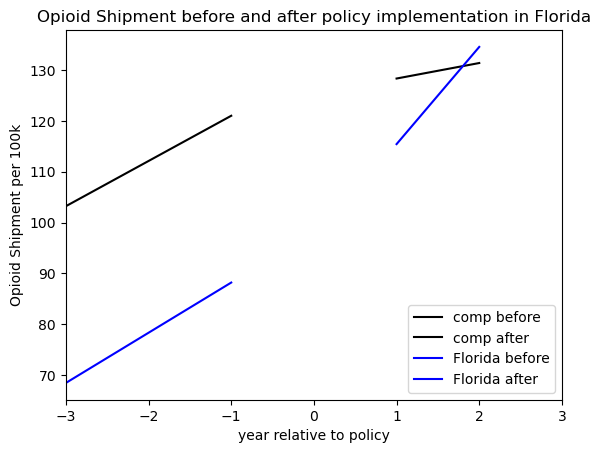

In [25]:
plt.xlim(-3, 3)
#plt.ylim(0, 500)
plt.title("Opioid Shipment before and after policy implementation in Florida")
plt.xlabel("year relative to policy")
plt.ylabel("Opioid Shipment per 100k")
plt.plot(X_b41, y_pred_b41,color='k', label = "comp before")
plt.plot(X_after1, y_pred_after1,color='k', label = "comp after")
plt.plot(X_b4, y_pred_b4,color='b', label = "Florida before")
plt.plot(X_after, y_pred_after,color='b', label = "Florida after")
plt.legend()
plt.show()